In [31]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 1. 가우시안 정규 분포
* 가우시안 정규 분포(Gaussian normal distribution)(혹은 정규 분포(normal distribution))는 자연 현상에서 나타나는 숫자를 확률 모형으로 모형화할 때 많이 사용한다.
* 정규 분포는 평균 $\mu$와 분산 $\sigma^2$ 두 개의 모수만으로 정의된다.

#### 확률밀도함수(pdf: probability density function)
$$ N(x;\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}exp(-\frac{(x - \mu)^2}{2\sigma^2}) $$

#### 정밀도(precision) $\beta$
분산의 역수
$$ \beta = \frac{1}{\sigma^2} $$

#### 표준 정규 분포(standard normal distribution)
평균이 0, 분산이 1($\mu = 0, \sigma^2 = 1$)인 정규 분포

#### 정규 분포의 확률밀도함수의 성질
* $x = \mu$일 때 확률밀도가 최대가 된다.
* $x = \infty$로 다가가거나 $x = -\infty$로 다가갈수록 확률밀도가 작아진다.

# 2. SciPy를 사용한 정규 분포의 시뮬레이션
##### norm 클래스
정규 분포 클래스
* Scipy의 stats 서브 패키지에 내장
* `norm(loc, scale)1`
    * `loc` : 기댓값 $\mu$ 
    * `scale` : 표준편차 $\sqrt{\sigma^2}$

In [32]:
import scipy as sp

mu = 0
std = 1
rv = sp.stats.norm(mu, std)

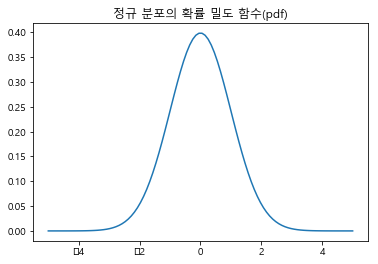

In [33]:
# 확률밀도함수
import numpy as np
import matplotlib.pyplot as plt

xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.title("정규 분포의 확률 밀도 함수(pdf)")
plt.show()

In [34]:
# 시뮬레이션을 통해 표본 얻기
np.random.seed(0)
x = rv.rvs(20)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574])

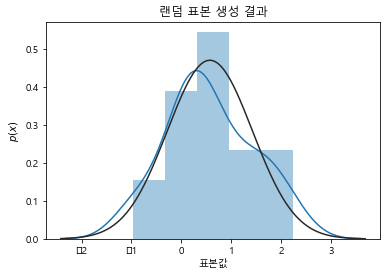

In [35]:
import seaborn as sns

sns.distplot(x, kde=True, fit=sp.stats.norm)
plt.title("랜덤 표본 생성 결과")
plt.xlabel("표본값")
plt.ylabel("$p(x)$")
plt.show()

# 3. Q-Q 플롯
* Q-Q(Quantile-Quantile) 플롯 : 동일 분위수에 해당하는 정상 분포의 값과 주어진 데이터의 값을 한 쌍으로 만들어 그린 스캐터 플롯(scatter plot)
    * 표본 데이터의 분포와 정규 분포의 분포 형태를 비교하여 표본 데이터가 정규 분포를 따르는지 검사하는 간단한 시각적 도구

#### Q-Q 플롯 그리는 방법
대략적인 방법론임
1. 표본 데이터를 정렬(sort)한다.
2. 하나하나의 표본 데이터가 전체 데이터 중의 몇 %정도에 해당하는지 위치 값을 구한다.  
    * SciPy에서는 특정 순위의 값이 나타날 가능성이 높은 값을 뜻하는 순서 통계량(order statistics)이라는 값을 이용한다.
3. 각 표본 데이터의 위치 값이 정규 분포의 누적확률함수(cdf) 값이 되는 표준 정규 분포의 표본값을 구한다.  
즉 정규 분포의 분위함수(quantile function) 값을 구한다.
    * 분위함수 : 누적확률함수의 역함수  
    * ex)  
    표본 정규 분포의 1%의 분위함수 값은 $F^{-1}(0.01)$, 약 -2.326이다.
4. 표본 데이터와 그에 대응하는 분위수를 하나의 쌍으로 간주하여 2차원 공간에 하나의 점(point)으로 그린다.
5. 모든 표본에 대해 2 ~ 4과정을 반복하여 스캐터 플롯을 완성한다.

정규 분포를 따르는 데이터 표본의 Q-Q 플롯을 그리면 직선 형태로 나타난다.

In [36]:
x_sorted = np.sort(x)
x_sorted

array([-0.97727788, -0.85409574, -0.20515826, -0.15135721, -0.10321885,
        0.12167502,  0.14404357,  0.3130677 ,  0.33367433,  0.40015721,
        0.4105985 ,  0.44386323,  0.76103773,  0.95008842,  0.97873798,
        1.45427351,  1.49407907,  1.76405235,  1.86755799,  2.2408932 ])

In [37]:
from scipy.stats.morestats import _calc_uniform_order_statistic_medians

position = _calc_uniform_order_statistic_medians(len(x))
position

array([0.03406367, 0.08261724, 0.13172109, 0.18082494, 0.2299288 ,
       0.27903265, 0.32813651, 0.37724036, 0.42634422, 0.47544807,
       0.52455193, 0.57365578, 0.62275964, 0.67186349, 0.72096735,
       0.7700712 , 0.81917506, 0.86827891, 0.91738276, 0.96593633])

In [38]:
qf = rv.ppf(position)
qf

array([-1.8241636 , -1.38768012, -1.11829229, -0.91222575, -0.73908135,
       -0.5857176 , -0.44506467, -0.31273668, -0.18568928, -0.06158146,
        0.06158146,  0.18568928,  0.31273668,  0.44506467,  0.5857176 ,
        0.73908135,  0.91222575,  1.11829229,  1.38768012,  1.8241636 ])

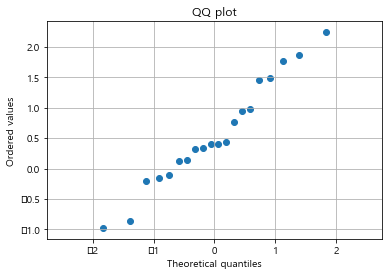

In [39]:
plt.scatter(qf, x_sorted)
plt.title("QQ plot")
plt.xlabel("Theoretical quantiles")
plt.ylabel("Ordered values")
plt.axis("equal")
plt.grid()
plt.show()

##### probplot
Q-Q플롯을 계산하고 그린다.
* SciPy의 stats 서브 패키지에 내장
* http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
* 인수로 보낸 데이터 표본에 대한 Q-Q정보만 반환함으로 차트를 그리려면 `plot` 인수에 matplotlib.pylab 모듈 객체 혹은 `Axes` 클래스 객체를 넘겨주어야 한다.


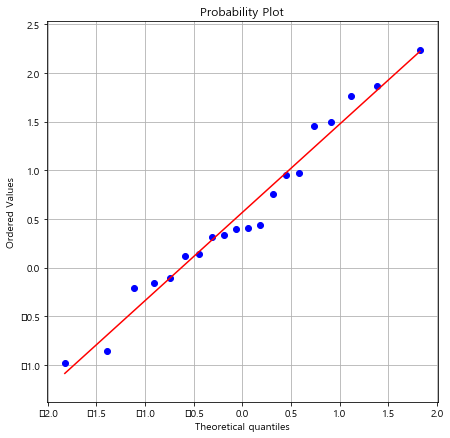

In [40]:
np.random.seed(0)
plt.figure(figsize=(7,7))
sp.stats.probplot(x, plot=plt)
plt.axis("equal")
plt.grid()
plt.show()

#### 정규 분포를 따르지 않는 데이터 표본의 Q-Q 플롯
직선이 아닌 휘어진 형태로 나타난다.

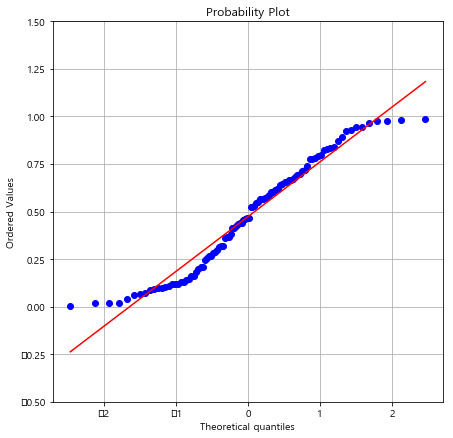

In [41]:
np.random.seed(0)
x = np.random.rand(100)
plt.figure(figsize=(7, 7))
sp.stats.probplot(x, plot=plt)
plt.ylim(-0.5, 1.5)
plt.grid()
plt.show()

# 4. 중심 극한 정리
* 중심 극한 정리(Central Limit Theorem) : 여러 확률 변수의 합이 정규 분포와 비슷한 분포를 이루는 현상
    *  실세계에서 발생하는 현상 중 많은 것들이 중심 극한 정리에 의해 정규 분포로 모형화가 가능하다.

#### 중심 극한 정리의 수학적 정의
* $X_1, \dots, X_N$가 기댓값이 $\mu$, 분산이 $\sigma^2$으로 동일한 분포(기댓값과 분산의 값이 동일할 뿐, 분포의 모양은 달라도 된다.)이며,서로 독립인 확률변수들이라고 할 때(분포가 어떤 분포인지는 상관없다.)  
$X_1, \dots, X_N$에서 뽑은 각각의 표본 데이터 $x_1, \dots, x_N$의 표본 평균
$$ \bar x_N = \frac{1}{N}(x_1 + \dots + x_N) $$
도 마찬가지로 예측할 수 없는 확률 변수다.  
이를 확률변수 $\bar X_N$이라 하자.
* 이 표본 평균의 평균이 0, 분산이 1이 되도록 정규화하면
$$ \frac{\bar x_N - \mu}{\frac{\sigma}{\sqrt{N}}} $$
* 중심 극한 정리에 따르면,  
정규화된 표본평균의 분포는 $N$이 증가할수록 표준 정규 분포에 수렴한다.
$$ \frac{\bar X_N - \mu}{\frac{\sigma}{\sqrt{N}}} →^d N(x;0,1) $$
    * $\to^d$ : 표본의 갯수 $N$이 커질수록 분포의 모양이 특정한 분포에 수렴한다는 뜻

#### 시뮬레이션을 사용한 중심 극한 정리 성립 확인하기
0 ~ 1의 균일 분포(uniform distribution)의 표본을 각각 1번, 2번, 10번 생성하여 그 합의 분포를 본다.  
여기에서 0 ~ 1의 균일 분포의 기댓값은 $\frac{1}{2}$, 분산은 $\frac{1}{12}$이다.

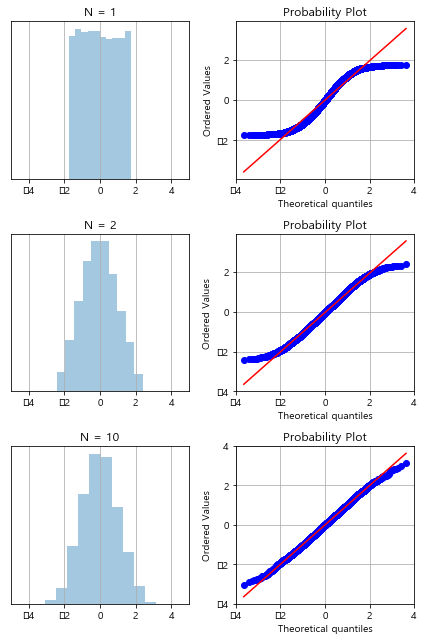

In [42]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)
plt.figure(figsize=(6, 9))

for i, N in enumerate([1, 2, 10]):
    X = np.random.rand(5000, N)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N)
    ax = plt.subplot(3, 2, 2 * i + 1)
    sns.distplot(Xbar, bins=10, kde=False, norm_hist=True)
    plt.xlim(-5, 5)
    plt.yticks([])
    plt.grid()
    ax.set_title("N = {0}".format(N))
    
    plt.subplot(3, 2, 2 * i + 2)
    plt.grid()
    sp.stats.probplot(Xbar, plot=plt)
    
plt.tight_layout()
plt.show()

더하는 분포의 수가 10개 정도가 되면 그 합은 정규 분포에 상당히 가까워짐을 볼 수 있다.

# 5. 가우시안 정규 분포의 통계량 분포
#### 복수의 가우시안 정규 분포로부터 얻은 표본의 합은 정규 분포이다.
$$ x_i ∼ N(\mu, \sigma^2) → \sum_{i=1}^Nx_i ∼ N(N\mu, N\sigma^2) $$

* 가우시안 정규 분포의 표본에 상수를 빼거나 곱해도 가우시안 정규 분포이다.
* 따라서 표본 평균도 가우시안 정규 분포이며, 여기에 상수 $N\mu$를 빼거나 상수 $\frac{\sigma}{\sqrt{N}}$로 나누어도 마찬가지로 가우시안 정규 분포이다.  
다만 기댓값 0, 표준편차 1인 표준 정규 분포가 된다.
$$ x_i ∼ N(\mu, \sigma^2) → z = \frac{\bar x - \mu}{\frac{\sigma}{\sqrt{N}}} ∼ N(x;0,1) $$

#### z 통계량
가우시안 정규 분포의 표본의 평균을 정규화한 통계량
* 중심극한정리와 다른 점
    * 중심극한정리에서는 표준 정규 분포로 점점 다가갈 뿐이고 표본의 갯수가 무한대가 되기 전에는 정확한 정규 분포가 아니지만, z 통계량은 갯수 $N$에 상관없이 항상 정확하게 표준 정규분포이다.

## 연습 문제
정규 분포로부터 나온 $N$개의 표본의 표본평균이 정규분포가 된다는 것을 시뮬레이션과 Q-Q 플롯을 사용하여 보여라.
1. $N = 2$ 일 때

2. $N = 10$ 일 때